In [1]:
# Libraries

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import patoolib
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from matplotlib import pyplot
import statistics


# settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# seed
random.seed(42)

### Task 1 - importing homework 1 arrays & prep

In [35]:
# Importing arrays from homework 1

# block feature arrays
image012 = pd.read_csv('image012.csv')
image01 = pd.read_csv('image01.csv')

# sliding block arrays

image0_SB = pd.read_csv('image0_SlidingBlock.csv')
image1_SB = pd.read_csv('image1_SlidingBlock.csv')
image2_SB = pd.read_csv('image2_SlidingBlock.csv')

# labeling sliding block arrays
image0_SB['label'] = 0                 # Acadian Flycatcher =  0
image1_SB['label']  = 1             # Vermillion Flycatcher =  1
image2_SB['label']  = 2          # ScissorTailed Flycatcher =  2


# concatenating slidng block arrays
image012_SB = pd.concat([image0_SB, image1_SB, image2_SB], ignore_index=True, axis=0)
image01_SB = pd.concat([image0_SB, image1_SB], ignore_index=True, axis=0)

# randomizing the arrays 
image012 =  image012.sample(frac=1, random_state=1)
image01 =  image01.sample(frac=1, random_state=1)

image012_SB = image012_SB.sample(frac=1, random_state=1)
image01_SB =  image01_SB.sample(frac=1, random_state=1)

### Checking if unprocessed data set has an equal representation of all classes.  There is not an issue with imbalanced data.

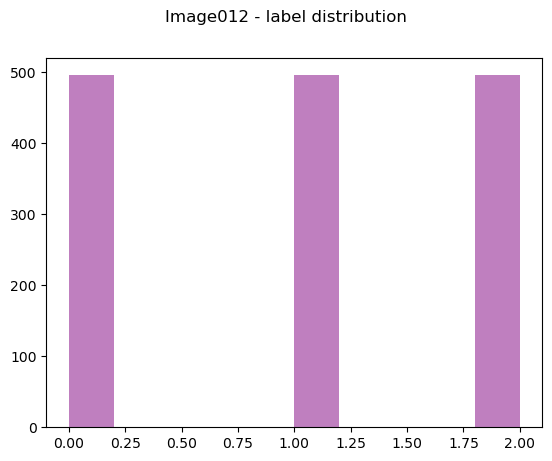

In [36]:
pyplot.hist(image012['label'], alpha=0.5, color = 'purple')
pyplot.suptitle('Image012 - label distribution')
pyplot.show()


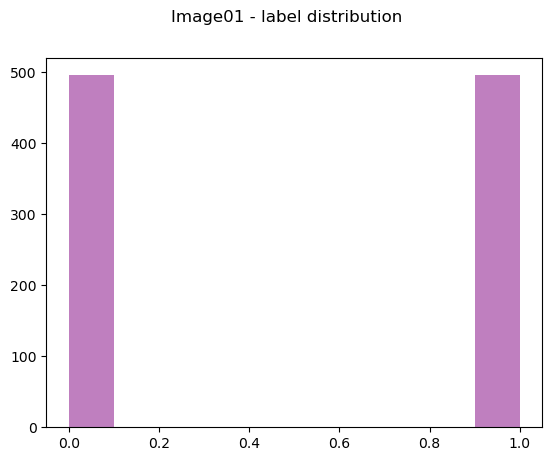

In [37]:
pyplot.hist(image01['label'], alpha=0.5, color = 'purple')
pyplot.suptitle('Image01 - label distribution')
pyplot.show()

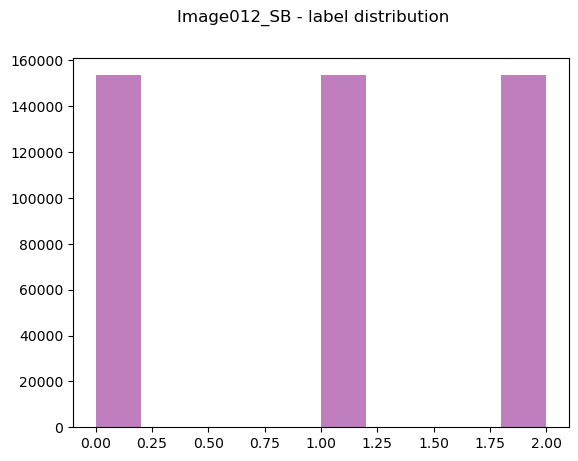

In [38]:
pyplot.hist(image012_SB['label'], alpha=0.5, color = 'purple')
pyplot.suptitle('Image012_SB - label distribution')
pyplot.show()

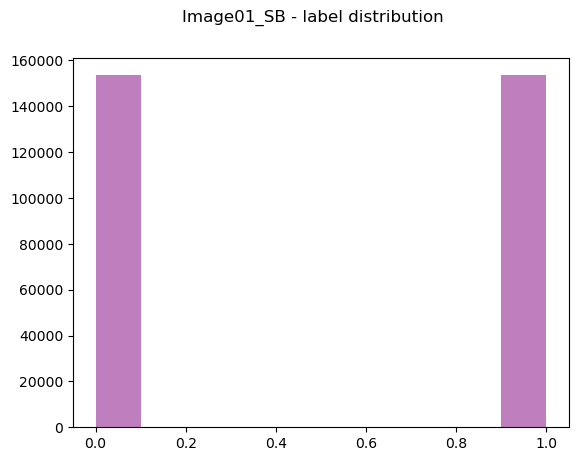

In [39]:
pyplot.hist(image01_SB['label'], alpha=0.5, color = 'purple')
pyplot.suptitle('Image01_SB - label distribution')
pyplot.show()

### Task 1 -  train test splits

In [40]:
# defining the FEATRUES vs the LABEL
# The features will be named with X and the label will be named with y

image012_X = image012.iloc[:, :-1]
image012_y = image012.iloc[:, -1]

image01_X = image012.iloc[:, :-1]
image01_y = image012.iloc[:, -1]

image012_SB_X = image012_SB.iloc[:, :-1]
image012_SB_y = image012_SB.iloc[:, -1]

image01_SB_X = image01_SB.iloc[:, :-1]
image01_SB_y = image01_SB.iloc[:, -1]


In [51]:
# seperating arrays into train and test

#train, test = train_test_split(df, test_size=0.2)

image012_X_train, image012_X_test, image012_y_train, image012_y_test  = train_test_split(image012_X, # dataframe
                                                                                         image012_y, # labels
                                                                                         stratify = image012_y, # maintains class balance in each split
                                                                                         test_size=0.2) # 80/20 split


image01_X_train, image01_X_test, image01_y_train, image01_y_test  = train_test_split(image01_X, # dataframe
                                                                                         image01_y, # labels
                                                                                         stratify = image01_y, # maintains class balance in each split
                                                                                         test_size=0.2) # 80/20 split


# Sliding block splits, opting to do a 70/30 split due to increased data size

image012_SB_X_train, image012_SB_X_test, image012_SB_y_train, image012_SB_y_test  = train_test_split(image012_SB_X, # dataframe
                                                                                         image012_SB_y, # labels
                                                                                         stratify = image012_SB_y, # maintains class balance in each split
                                                                                         test_size=0.3) # 70/30 split


image01_SB_X_train, image01_SB_X_test, image01_SB_y_train, image01_SB_y_test  = train_test_split(image01_SB_X, # dataframe
                                                                                         image01_SB_y, # labels
                                                                                         stratify = image01_SB_y, # maintains class balance in each split
                                                                                         test_size=0.3) # 70/30 split

In [52]:
# Checking train / test splits are correct

print('image012_X_train dimension are ' + str(image012_X_train.shape))
print('image012_y_train dimension are ' + str(image012_y_train.shape) +'\n')

print('image012_X_test dimension are ' + str(image012_X_test.shape))
print('image012_y_test dimension are ' + str(image012_y_test.shape)+'\n')

print('image01_X_train dimension are ' + str(image01_X_train.shape))
print('image01_y_train dimension are ' + str(image01_y_train.shape) +'\n')

print('image01_X_test dimension are ' + str(image01_X_test.shape))
print('image01_y_test dimension are ' + str(image01_y_test.shape)+'\n')

print('Sliding Block Vectors')

print('image012_SB_X_train dimension are ' + str(image012_SB_X_train.shape))
print('image012_SB_y_train dimension are ' + str(image012_SB_y_train.shape) +'\n')

print('image012_SB_X_test dimension are ' + str(image012_SB_X_test.shape))
print('image012_SB_y_test dimension are ' + str(image012_SB_y_test.shape)+'\n')

print('image01_SB_X_train dimension are ' + str(image01_SB_X_train.shape))
print('image01_SB_y_train dimension are ' + str(image01_SB_y_train.shape) +'\n')

print('image01_SB_X_test dimension are ' + str(image01_SB_X_test.shape))
print('image01_SB_y_test dimension are ' + str(image01_SB_y_test.shape)+'\n')

print('looks good to me!')

image012_X_train dimension are (1190, 256)
image012_y_train dimension are (1190,)

image012_X_test dimension are (298, 256)
image012_y_test dimension are (298,)

image01_X_train dimension are (1190, 256)
image01_y_train dimension are (1190,)

image01_X_test dimension are (298, 256)
image01_y_test dimension are (298,)

Sliding Block Vectors
image012_SB_X_train dimension are (322198, 256)
image012_SB_y_train dimension are (322198,)

image012_SB_X_test dimension are (138086, 256)
image012_SB_y_test dimension are (138086,)

image01_SB_X_train dimension are (214799, 256)
image01_SB_y_train dimension are (214799,)

image01_SB_X_test dimension are (92057, 256)
image01_SB_y_test dimension are (92057,)

looks good to me!


In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from numpy import absolute
from numpy import mean
from numpy import std

# lASSO regression

# define model
model = Lasso(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, image012_X_train, image012_y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.631 (0.023)


### Task 1 - Histograms

# Notes to self - fix verticle lines - they do not match up with the correct section

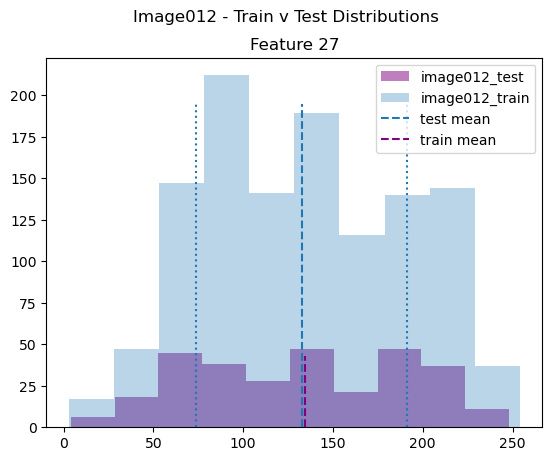

In [5]:
# Plots

mean_test = statistics.mean(image012_test['27'])
mean_train = statistics.mean(image012_train['27'])

sd_test = statistics.stdev(image012_test['27'])
sd_train = statistics.variance(image012_train['27'])

pyplot.hist(image012_test['27'], alpha=0.5, label='image012_test', color = 'purple')
pyplot.hist(image012_train['27'], alpha=0.3, label='image012_train')
pyplot.title('Feature 27')
pyplot.suptitle('Image012 - Train v Test Distributions')

# mean and and 1 SD for test
pyplot.vlines(mean_test, 0, 195, label = 'test mean', linestyles = 'dashed')

pyplot.vlines(mean_test + sd_test, 0, 195,linestyles = 'dotted')
pyplot.vlines(mean_test - sd_test, 0, 195, linestyles = 'dotted')


# mean and one standard deviation for train
pyplot.vlines(mean_train, 0, 43, label = 'train mean', colors = 'purple', linestyles = 'dashed')
#pyplot.vlines(mean_train + sd_train, 0, 43, linestyles = 'dotted', colors = 'purple')
#pyplot.vlines(mean_train - sd_train, 0, 43, linestyles = 'dotted',colors = 'purple')

pyplot.legend(loc='upper right')

pyplot.show()




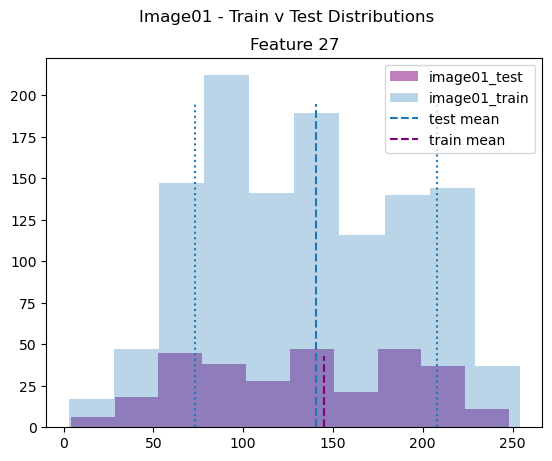

In [6]:
# Plots

mean_test = statistics.mean(image01_test['27'])
mean_train = statistics.mean(image01_train['27'])

sd_test = statistics.stdev(image01_test['27'])
sd_train = statistics.variance(image01_train['27'])

pyplot.hist(image012_test['27'], alpha=0.5, label='image01_test', color = 'purple')
pyplot.hist(image012_train['27'], alpha=0.3, label='image01_train')
pyplot.title('Feature 27')
pyplot.suptitle('Image01 - Train v Test Distributions')

# mean and and 1 SD for test
pyplot.vlines(mean_test, 0, 195, label = 'test mean', linestyles = 'dashed')

pyplot.vlines(mean_test + sd_test, 0, 195,linestyles = 'dotted')
pyplot.vlines(mean_test - sd_test, 0, 195, linestyles = 'dotted')


# mean and one standard deviation for train
pyplot.vlines(mean_train, 0, 43, label = 'train mean', colors = 'purple', linestyles = 'dashed')
#pyplot.vlines((mean_train + sd_train), 0, 43, linestyles = 'dotted', colors = 'purple')
#pyplot.vlines(mean_train - sd_train, 0, 43, linestyles = 'dotted',colors = 'purple')

pyplot.legend(loc='upper right')

pyplot.show()




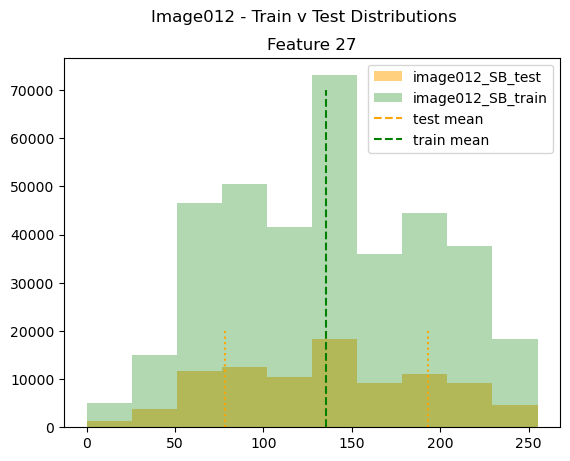

In [7]:
# Plots

mean_test = statistics.mean(image012_SB_test['27'])
mean_train = statistics.mean(image012_SB_train['27'])

sd_test = statistics.stdev(image012_SB_test['27'])
sd_train = statistics.variance(image012_SB_train['27'])

pyplot.hist(image012_SB_test['27'], alpha=0.5, label='image012_SB_test', color = 'orange')
pyplot.hist(image012_SB_train['27'], alpha=0.3, label='image012_SB_train', color = 'green')
pyplot.title('Feature 27')
pyplot.suptitle('Image012 - Train v Test Distributions')

# mean and and 1 SD for test
pyplot.vlines(mean_test, 0, 20000, label = 'test mean', linestyles = 'dashed', colors = 'orange')

pyplot.vlines(mean_test + sd_test, 0, 20000,linestyles = 'dotted', colors = 'orange')
pyplot.vlines(mean_test - sd_test, 0, 20000, linestyles = 'dotted', colors = 'orange')


# mean and one standard deviation for train
pyplot.vlines(mean_train, 0, 70000, label = 'train mean', colors = 'green', linestyles = 'dashed')

#pyplot.vlines((mean_train + sd_train), 0, 20000, linestyles = 'dotted', colors = 'purple')
#pyplot.vlines(mean_train - sd_train, 0, 20000, linestyles = 'dotted',colors = 'purple')

pyplot.legend(loc='upper right')

pyplot.show()

In [20]:
image012_SB.head(10)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,label
92360,208,208,209,209,208,208,208,209,210,210,210,210,210,210,210,210,210,210,210,211,211,211,210,210,211,211,211,211,211,211,210,210,209,209,210,211,211,211,211,211,211,211,212,212,212,212,212,212,210,210,211,212,212,212,212,212,213,213,213,212,212,212,212,211,211,211,212,212,213,213,213,213,213,214,214,213,213,213,213,213,211,211,212,212,213,213,213,213,214,214,214,215,215,215,215,215,211,211,212,213,213,214,214,214,215,215,215,216,216,216,216,216,212,212,213,214,214,215,215,215,215,216,216,216,216,216,216,216,213,213,213,214,214,215,215,215,215,215,215,215,215,215,214,214,213,213,213,214,214,214,214,215,214,214,214,214,214,214,214,214,211,212,213,213,213,213,214,214,213,213,213,213,213,213,213,213,211,212,213,213,212,212,213,214,213,213,213,213,213,213,213,213,211,212,212,212,212,212,212,213,212,212,213,213,213,214,213,213,211,212,212,212,212,212,212,213,212,212,213,213,214,214,214,214,212,212,212,213,213,213,213,213,213,213,213,214,215,215,215,215,212,213,213,213,214,214,215,215,214,214,214,214,215,215,215,215,0
35617,221,221,221,221,221,221,221,221,221,221,221,222,221,221,220,220,221,221,221,221,221,222,222,221,221,221,221,221,221,220,220,220,221,221,221,221,221,222,222,221,221,221,221,221,220,220,220,220,221,221,221,221,221,222,222,222,221,221,221,221,221,220,220,220,221,221,221,221,221,222,222,221,221,221,221,221,220,220,220,220,222,222,221,221,222,222,222,221,221,221,221,220,220,219,219,219,223,222,222,222,222,222,222,221,221,221,221,221,220,220,220,220,223,223,223,222,222,222,221,221,221,221,221,221,220,220,220,220,223,223,223,222,222,222,222,222,221,221,221,221,221,220,220,220,224,223,223,223,223,222,222,222,222,222,221,221,221,220,220,220,224,223,223,223,223,222,222,222,222,222,222,221,221,221,220,220,224,223,223,223,223,223,223,223,223,222,222,222,221,221,221,220,224,224,224,223,223,223,223,223,223,223,223,222,222,221,221,221,225,225,225,224,224,224,224,224,224,223,223,223,222,222,221,221,226,226,225,225,225,225,224,224,224,223,223,223,223,222,222,221,227,226,226,226,226,225,224,224,224,224,224,223,223,222,222,222,0
317990,84,83,83,82,83,83,82,83,84,84,84,83,84,84,83,84,85,83,82,81,82,81,83,83,82,82,83,85,84,83,82,83,84,82,82,82,82,81,83,83,83,83,84,85,85,84,84,85,83,82,83,82,83,82,82,83,83,84,84,85,85,84,83,84,82,81,83,83,84,82,82,83,84,84,83,84,83,83,83,83,83,81,83,83,83,82,81,83,84,84,83,83,83,83,84,84,83,82,83,82,84,82,82,83,84,84,84,84,85,85,84,84,83,82,83,82,84,83,82,83,84,83,84,85,85,85,84,84,83,82,83,83,85,84,83,84,83,83,83,84,85,85,86,86,83,82,82,82,83,83,81,82,83,84,85,85,85,85,83,84,83,82,83,82,84,83,83,83,83,84,84,84,84,84,85,85,83,82,83,82,84,83,83,83,84,84,84,84,84,84,85,85,82,81,82,81,83,82,83,83,83,84,84,84,84,84,85,84,82,81,82,81,83,82,82,82,83,84,84,84,84,84,85,84,83,82,83,82,83,82,82,83,83,84,84,84,83,83,86,85,83,82,83,82,83,82,83,83,83,83,83,83,83,83,85,85,2
35621,221,221,221,221,221,221,221,222,221,221,220,220,220,220,219,219,221,222,222,221,221,221,221,221,221,220,220,220,220,219,219,219,221,222,222,221,221,221,221,221,220,220,220,220,220,219,219,219,221,222,222,222,221,221,221,221,221,220,